In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def analytic_M(T_p):
    T_p_c = 2.269185
    z = np.exp(- 2 / T_p)
    if T_p <= T_p_c:
        return np.power(1 + z**2, 1/4) * np.power(1 - 6 * z**2 + z**4, 1/8) / np.sqrt(1 - z**2)
    else:
        return 0

In [3]:
# number of spins on each row and column of the 2D array
Ns = np.array([50])

# temperature times the Bolzmann constant divided by J, T_p = k * T / J
T_ps = np.arange(0, 5.05, 0.05)[::-1]

# number of steps taken in the Markov chain
steps = 500000

# an additional term to the energy divided by J due to an external magnetic field, H_p = H / J
H_ps = np.array([-0.2, 0., 0.2])

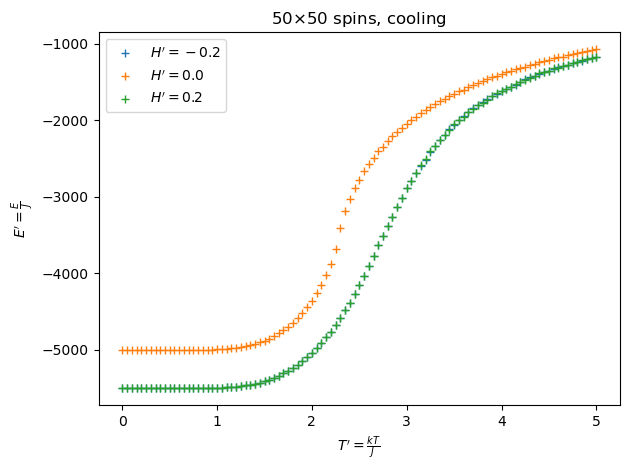

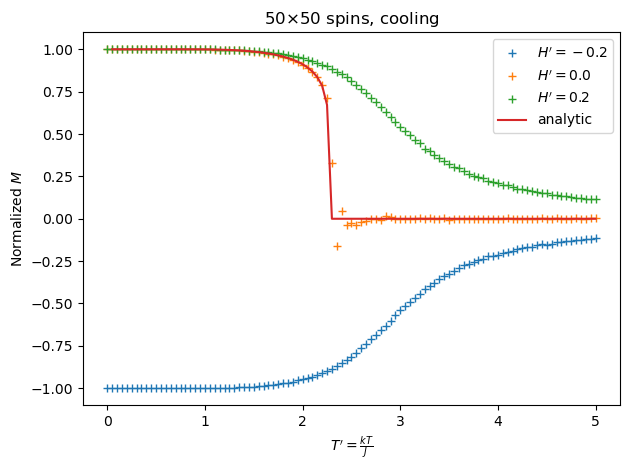

In [4]:
M_as = []
for T_p in T_ps[:-1]:
    M_as.append(analytic_M(T_p))
M_as = np.array(M_as)

for N in Ns:
    fig, ax = plt.subplots()
    for H_p in H_ps:
        E_ps = np.load(f'Data/cool_E_ps_N{N}_H_p{H_p}.npy')
        ax.plot(T_ps, E_ps, marker='+', linestyle='None', label=r'$H^{\prime}' + f' = {H_p}$')
    ax.legend()
    ax.set_xlabel(r'$T^{\prime} = \frac{kT}{J}$')
    ax.set_ylabel(r'$E^{\prime} = \frac{E}{J}$')
    ax.set_title(f'{N}' + r'$\times$' + f'{N} spins, cooling')
    # ax.invert_xaxis()
    fig.tight_layout()
    plt.savefig(f'Figs/cool_energy_N{N}.png', bbox_inches='tight')
    plt.show()
    
for N in Ns:
    fig, ax = plt.subplots()
    for H_p in H_ps:
        M_norms = np.load(f'Data/cool_M_norms_N{N}_H_p{H_p}.npy')
        ax.plot(T_ps, M_norms, marker='+', linestyle='None', label=r'$H^{\prime}' + f' = {H_p}$')
    ax.plot(T_ps[:-1], M_as, label='analytic')
    ax.legend()
    ax.set_xlabel(r'$T^{\prime} = \frac{kT}{J}$')
    ax.set_ylabel(r'Normalized $M$')
    ax.set_title(f'{N}' + r'$\times$' + f'{N} spins, cooling')
    # ax.invert_xaxis()
    fig.tight_layout()
    plt.savefig(f'Figs/cool_magnetization_N{N}.png', bbox_inches='tight')
    plt.show()


In [5]:
analytic_M(2.269)

0.37688922642197736